# CS131-8L BM2 PARAGUAY 1Q2223
## GROUP MEMBERS
- CORTEZ, MARK MOISES T.
- GENETA, DANIEL M.
- GIL, CLAIRE FRANCHESKA M.
- PEPITO, ALYSSA MAE M.
- SOLEÑO, KEZIAH ANTONETTE C.
- VELASCO, SADIE CATHERINE E.

### Import Libraries

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Data Understanding

#### Collection of Initial Data

In [62]:
# Read dataset
df = pd.read_excel("satisfaction_2015.xlsx")
df = df.rename(columns={"satisfaction_v2":"satisfaction"}) # Rename satisfaction_v2 to satisfaction
df.head()

,id,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,...,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,...,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,...,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,...,3,3,3,4,5,3,4,3,0,0.0


#### Data Description

In [63]:
# Getting summary statistics
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


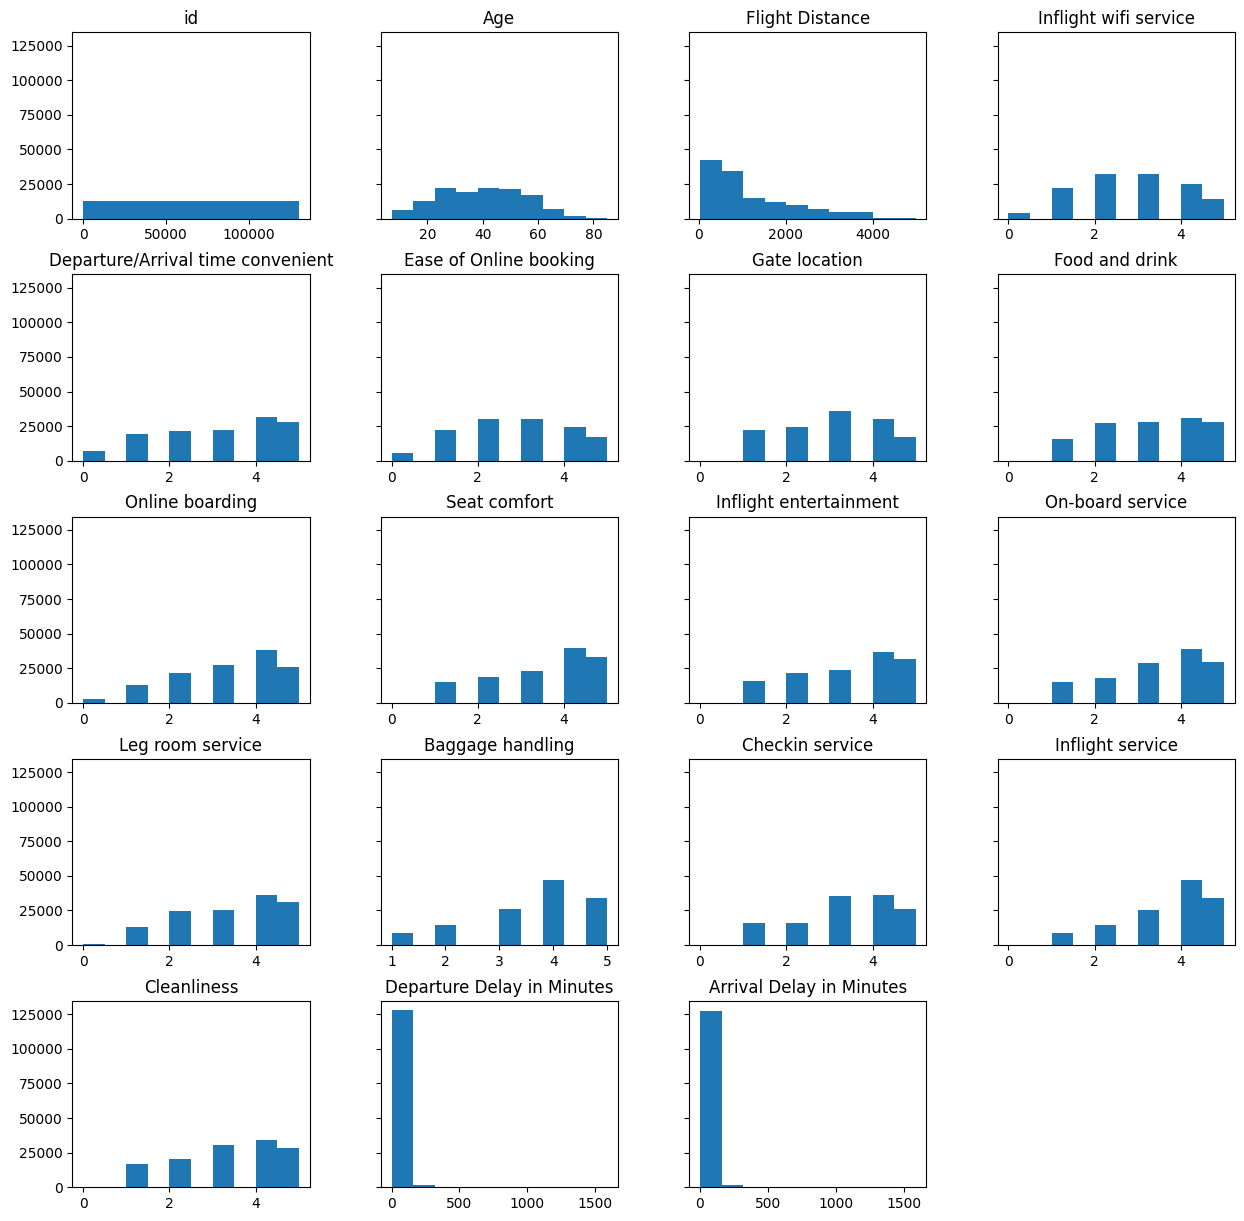

In [64]:
# Create histograms to show distribution of variables

numeric_variables = list(df.select_dtypes(include=['int64', 'float64'])) #select the numeric variables

df[numeric_variables].describe().apply(lambda x:round(x,2)).T  #apply describe method

histograms = df[numeric_variables].hist(bins =10, 
                                              xlabelsize=10, 
                                              ylabelsize=10, 
                                              grid=False, 
                                              sharey= True, figsize = (15,15))

#### Data Exploration

##### Exploring categorical data

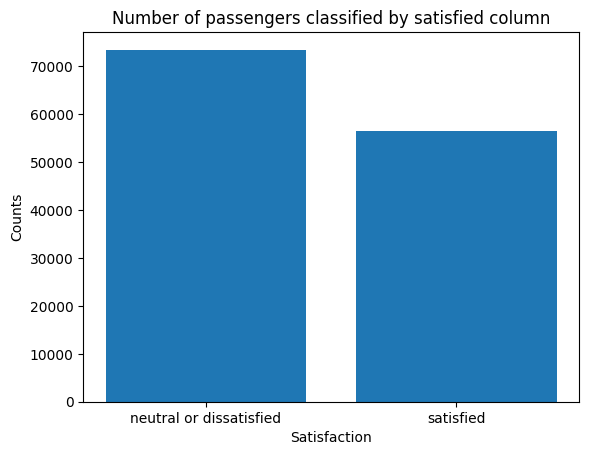

In [65]:
satisfaction_counts = df['satisfaction'].value_counts().rename_axis('satisfaction').reset_index(name='counts')
plt.bar(satisfaction_counts['satisfaction'].to_numpy(), satisfaction_counts['counts'].to_numpy())
plt.title("Number of passengers classified by satisfied column")
plt.xlabel('Satisfaction')
plt.ylabel('Counts')
plt.show()

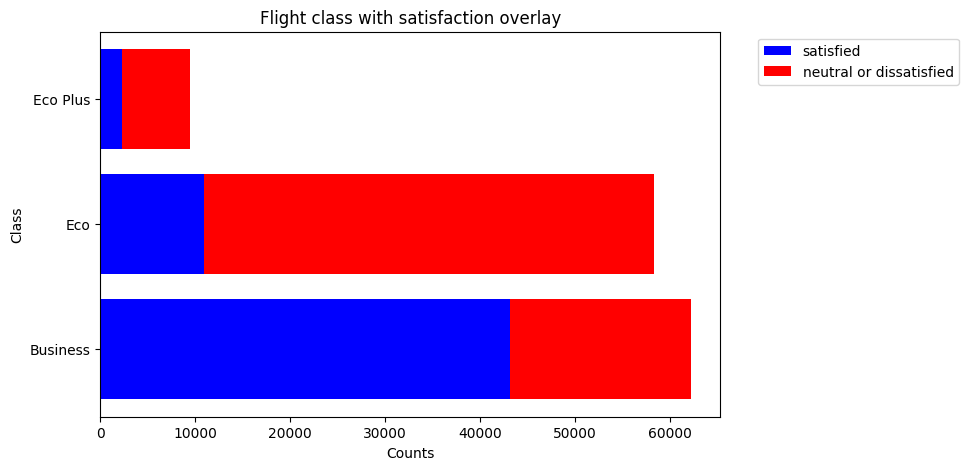

In [66]:
class_satisfaction_grpby = df[["Class", "satisfaction"]]
class_satisfaction_grpby = class_satisfaction_grpby.groupby(["Class", "satisfaction"]).size().reset_index(name="counts")

business_satisfied = class_satisfaction_grpby.query("Class == 'Business' and satisfaction == 'satisfied'")['counts'].tolist()
eco_satisfied = class_satisfaction_grpby.query("Class == 'Eco' and satisfaction == 'satisfied'")['counts'].tolist()
eco_plus_satisfied = class_satisfaction_grpby.query("Class == 'Eco Plus' and satisfaction == 'satisfied'")['counts'].tolist()

business_unsatisfied = class_satisfaction_grpby.query("Class == 'Business' and satisfaction == 'neutral or dissatisfied'")['counts'].to_list()
eco_unsatisfied = class_satisfaction_grpby.query("Class == 'Eco' and satisfaction == 'neutral or dissatisfied'")['counts'].tolist()
eco_plus_unsatisfied = class_satisfaction_grpby.query("Class == 'Eco Plus' and satisfaction == 'neutral or dissatisfied'")['counts'].tolist()

x = ['Business', 'Eco', 'Eco Plus']
y1 = np.array([business_satisfied, eco_satisfied, eco_plus_satisfied]).flatten()
y2 = np.array([business_unsatisfied, eco_unsatisfied, eco_plus_unsatisfied]).flatten()

# plot bars in stack manner
plt.figure(figsize=(8,5))
plt.barh(x, y1, color='b')
plt.barh(x, y2, left=y1, color='r')
plt.xlabel("Counts")
plt.ylabel("Class")
plt.legend(["satisfied", "neutral or dissatisfied"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Flight class with satisfaction overlay")
plt.show()

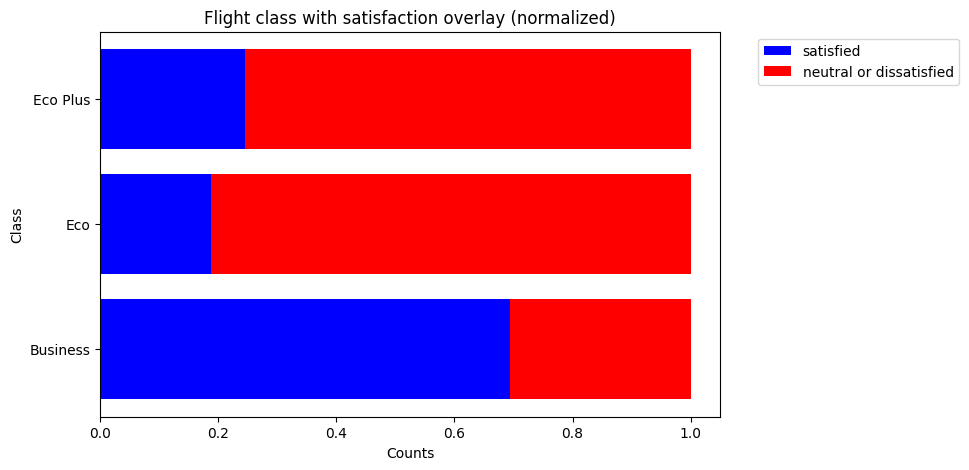

In [67]:
business_total = np.add(business_satisfied, business_unsatisfied)
business_satis_percent = np.divide(business_satisfied, business_total)
business_unsatis_percent = np.divide(business_unsatisfied, business_total)
business_satis_percent = np.round(business_satis_percent, 3)
business_unsatis_percent = np.round(business_unsatis_percent, 3)

eco_total = np.add(eco_satisfied, eco_unsatisfied)
eco_satis_percent = np.divide(eco_satisfied, eco_total)
eco_unsatis_percent = np.divide(eco_unsatisfied, eco_total)
eco_satis_percent = np.round(eco_satis_percent, 3)
eco_unsatis_percent = np.round(eco_unsatis_percent, 3)

eco_plus_total = np.add(eco_plus_satisfied, eco_plus_unsatisfied)
eco_plus_satis_percent = np.divide(eco_plus_satisfied, eco_plus_total)
eco_plus_unsatis_percent = np.divide(eco_plus_unsatisfied, eco_plus_total)
eco_plus_satis_percent = np.round(eco_plus_satis_percent, 3)
eco_plus_unsatis_percent = np.round(eco_plus_unsatis_percent, 3)

y1 = np.array([business_satis_percent, eco_satis_percent, eco_plus_satis_percent]).flatten()
y2 = np.array([business_unsatis_percent, eco_unsatis_percent, eco_plus_unsatis_percent]).flatten()

# plot bars in stack manner
plt.figure(figsize=(8,5))
plt.barh(x, y1, color='b')
plt.barh(x, y2, left=y1, color='r')
plt.xlabel("Counts")
plt.ylabel("Class")
plt.legend(["satisfied", "neutral or dissatisfied"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Flight class with satisfaction overlay (normalized)")
plt.show() # Objective 1

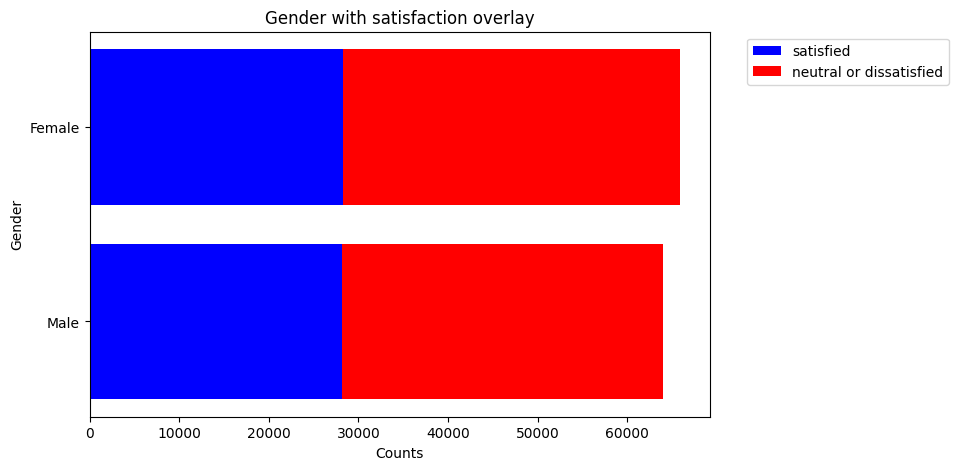

In [68]:
gender_satisfaction_grpby = df[["Gender", "satisfaction"]]
gender_satisfaction_grpby = gender_satisfaction_grpby.groupby(["Gender", "satisfaction"]).size().reset_index(name="counts")

male_satisfied = gender_satisfaction_grpby.query("Gender == 'Male' and satisfaction == 'satisfied'")['counts'].tolist()
female_satisfied = gender_satisfaction_grpby.query("Gender == 'Female' and satisfaction == 'satisfied'")['counts'].tolist()

male_unsatisfied = gender_satisfaction_grpby.query("Gender == 'Male' and satisfaction == 'neutral or dissatisfied'")['counts'].to_list()
female_unsatisfied = gender_satisfaction_grpby.query("Gender == 'Female' and satisfaction == 'neutral or dissatisfied'")['counts'].tolist()

x = ['Male', 'Female']
y1 = np.array([male_satisfied, female_satisfied]).flatten()
y2 = np.array([male_unsatisfied, female_unsatisfied]).flatten()

# plot bars in stack manner
plt.figure(figsize=(8,5))
plt.barh(x, y1, color='b')
plt.barh(x, y2, left=y1, color='r')
plt.xlabel("Counts")
plt.ylabel("Gender")
plt.legend(["satisfied", "neutral or dissatisfied"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Gender with satisfaction overlay")
plt.show()

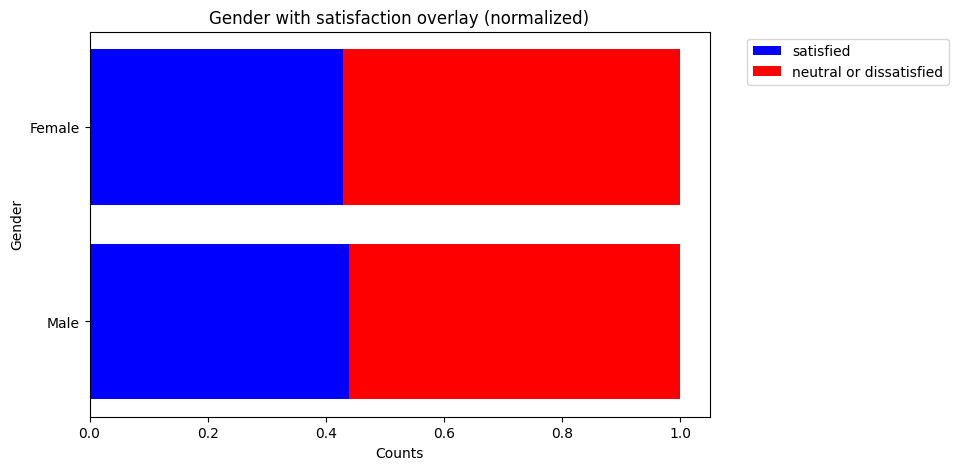

In [69]:
male_total = np.add(male_satisfied, male_unsatisfied)
male_satis_percent = np.divide(male_satisfied, male_total)
male_unsatis_percent = np.divide(male_unsatisfied, male_total)
male_satis_percent = np.round(male_satis_percent, 3)
male_unsatis_percent = np.round(male_unsatis_percent, 3)

female_total = np.add(female_satisfied, female_unsatisfied)
female_satis_percent = np.divide(female_satisfied, female_total)
female_unsatis_percent = np.divide(female_unsatisfied, female_total)
female_satis_percent = np.round(female_satis_percent, 3)
female_unsatis_percent = np.round(female_unsatis_percent, 3)

y1 = np.array([male_satis_percent, female_satis_percent]).flatten()
y2 = np.array([male_unsatis_percent, female_unsatis_percent]).flatten()

# plot bars in stack manner
plt.figure(figsize=(8,5))
plt.barh(x, y1, color='b')
plt.barh(x, y2, left=y1, color='r')
plt.xlabel("Counts")
plt.ylabel("Gender")
plt.legend(["satisfied", "neutral or dissatisfied"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Gender with satisfaction overlay (normalized)")
plt.show()


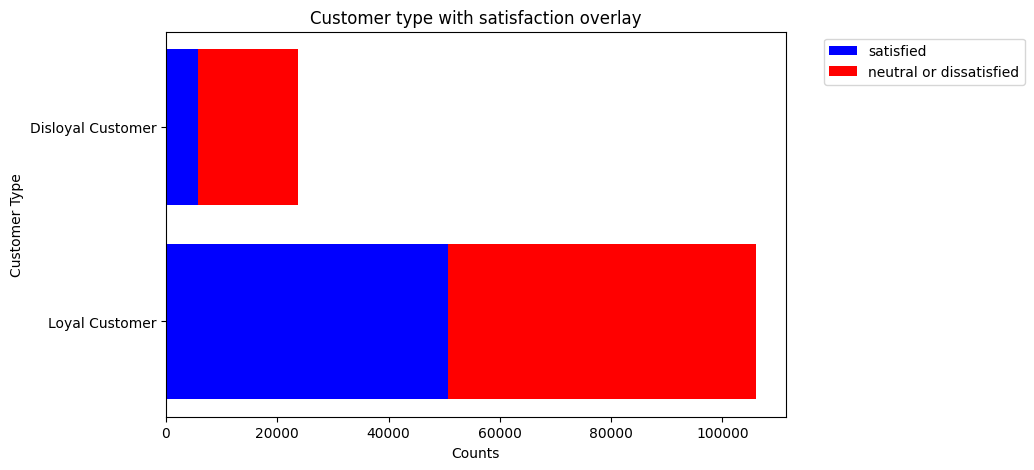

In [70]:
customer_type_satisfaction_grpby = df[["Customer Type", "satisfaction"]]
customer_type_satisfaction_grpby = customer_type_satisfaction_grpby.groupby(["Customer Type", "satisfaction"]).size().reset_index(name="counts")

disloyal_satisfied = customer_type_satisfaction_grpby.query("`Customer Type` == 'disloyal Customer' and satisfaction == 'satisfied'")['counts'].tolist()
loyal_satisfied = customer_type_satisfaction_grpby.query("`Customer Type` == 'Loyal Customer' and satisfaction == 'satisfied'")['counts'].tolist()

disloyal_unsatisfied = customer_type_satisfaction_grpby.query("`Customer Type` == 'disloyal Customer' and satisfaction == 'neutral or dissatisfied'")['counts'].to_list()
loyal_unsatisfied = customer_type_satisfaction_grpby.query("`Customer Type` == 'Loyal Customer' and satisfaction == 'neutral or dissatisfied'")['counts'].tolist()

x = ['Loyal Customer', 'Disloyal Customer']
y1 = np.array([loyal_satisfied, disloyal_satisfied]).flatten()
y2 = np.array([loyal_unsatisfied, disloyal_unsatisfied]).flatten()

# plot bars in stack manner
plt.figure(figsize=(8,5))
plt.barh(x, y1, color='b')
plt.barh(x, y2, left=y1, color='r')
plt.xlabel("Counts")
plt.ylabel("Customer Type")
plt.legend(["satisfied", "neutral or dissatisfied"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Customer type with satisfaction overlay")
plt.show()

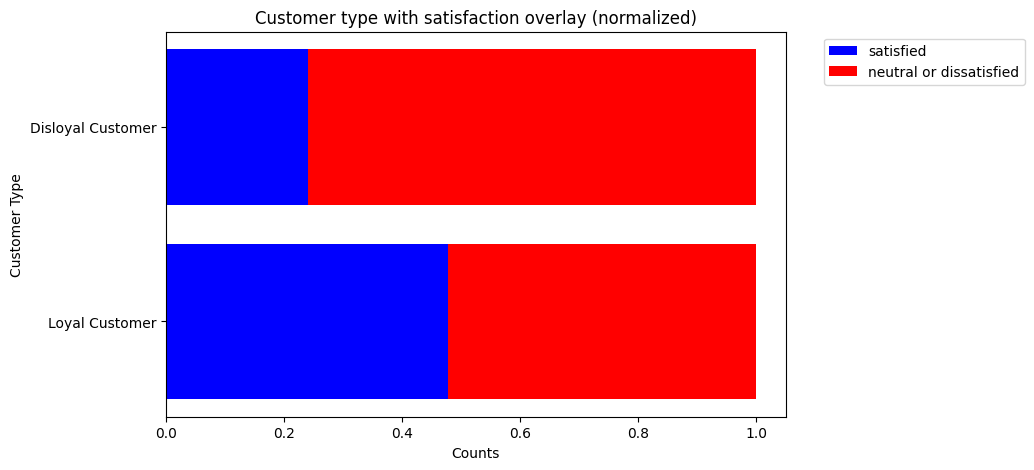

In [71]:
loyal_total = np.add(loyal_satisfied, loyal_unsatisfied)
loyal_satis_percent = np.divide(loyal_satisfied, loyal_total)
loyal_unsatis_percent = np.divide(loyal_unsatisfied, loyal_total)
loyal_satis_percent = np.round(loyal_satis_percent, 3)
loyal_unsatis_percent = np.round(loyal_unsatis_percent, 3)

disloyal_total = np.add(disloyal_satisfied, disloyal_unsatisfied)
disloyal_satis_percent = np.divide(disloyal_satisfied, disloyal_total)
disloyal_unsatis_percent = np.divide(disloyal_unsatisfied, disloyal_total)
disloyal_satis_percent = np.round(disloyal_satis_percent, 3)
disloyal_unsatis_percent = np.round(disloyal_unsatis_percent, 3)

y1 = np.array([loyal_satis_percent, disloyal_satis_percent]).flatten()
y2 = np.array([loyal_unsatis_percent, disloyal_unsatis_percent]).flatten()

# plot bars in stack manner
plt.figure(figsize=(8,5))
plt.barh(x, y1, color='b')
plt.barh(x, y2, left=y1, color='r')
plt.xlabel("Counts")
plt.ylabel("Customer Type")
plt.legend(["satisfied", "neutral or dissatisfied"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Customer type with satisfaction overlay (normalized)")
plt.show()

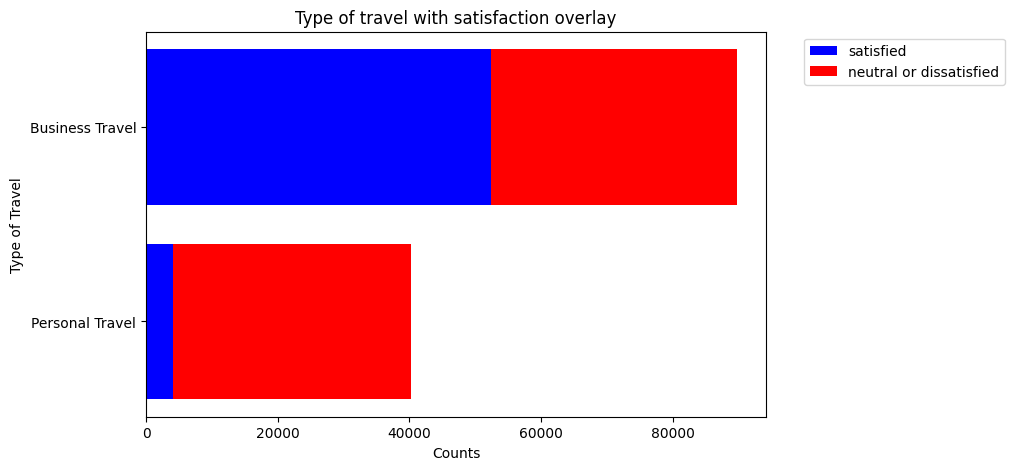

In [72]:
travel_type_satisfaction_grpby = df[["Type of Travel", "satisfaction"]]
travel_type_satisfaction_grpby = travel_type_satisfaction_grpby.groupby(["Type of Travel", "satisfaction"]).size().reset_index(name="counts")

personal_travel_satisfied = travel_type_satisfaction_grpby.query("`Type of Travel` == 'Personal Travel' and satisfaction == 'satisfied'")['counts'].tolist()
business_travel_satisfied = travel_type_satisfaction_grpby.query("`Type of Travel` == 'Business travel' and satisfaction == 'satisfied'")['counts'].tolist()

personal_travel_unsatisfied = travel_type_satisfaction_grpby.query("`Type of Travel` == 'Personal Travel' and satisfaction == 'neutral or dissatisfied'")['counts'].to_list()
business_travel_unsatisfied = travel_type_satisfaction_grpby.query("`Type of Travel` == 'Business travel' and satisfaction == 'neutral or dissatisfied'")['counts'].tolist()

x = ['Personal Travel', 'Business Travel']
y1 = np.array([personal_travel_satisfied, business_travel_satisfied]).flatten()
y2 = np.array([personal_travel_unsatisfied, business_travel_unsatisfied]).flatten()

# plot bars in stack manner
plt.figure(figsize=(8,5))
plt.barh(x, y1, color='b')
plt.barh(x, y2, left=y1, color='r')
plt.xlabel("Counts")
plt.ylabel("Type of Travel")
plt.legend(["satisfied", "neutral or dissatisfied"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Type of travel with satisfaction overlay")
plt.show()

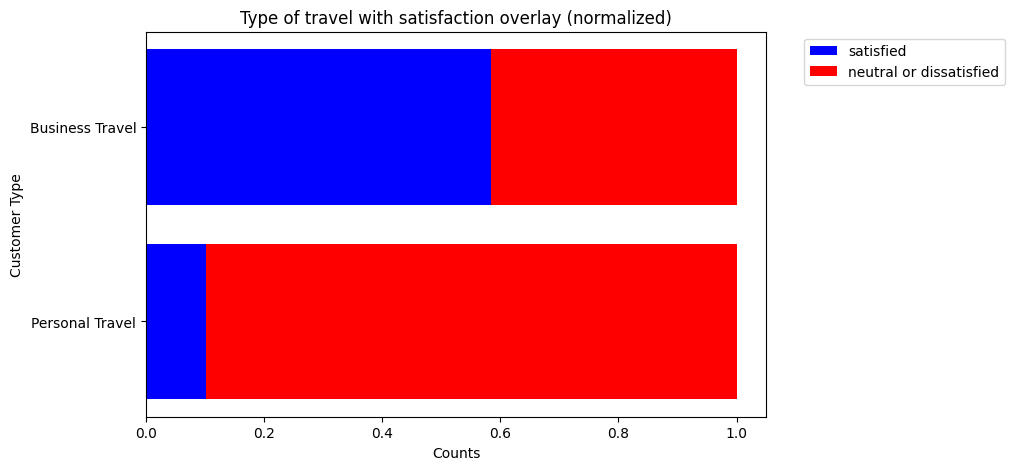

In [73]:
personal_travel_total = np.add(personal_travel_satisfied, personal_travel_unsatisfied)
personal_travel_satis_percent = np.divide(personal_travel_satisfied, personal_travel_total)
personal_travel_unsatis_percent = np.divide(personal_travel_unsatisfied, personal_travel_total)
personal_travel_satis_percent = np.round(personal_travel_satis_percent, 3)
personal_travel_unsatis_percent = np.round(personal_travel_unsatis_percent, 3)

business_travel_total = np.add(business_travel_satisfied, business_travel_unsatisfied)
business_travel_satis_percent = np.divide(business_travel_satisfied, business_travel_total)
business_travel_unsatis_percent = np.divide(business_travel_unsatisfied, business_travel_total)
business_travel_satis_percent = np.round(business_travel_satis_percent, 3)
business_travel_unsatis_percent = np.round(business_travel_unsatis_percent, 3)

y1 = np.array([personal_travel_satis_percent, business_travel_satis_percent]).flatten()
y2 = np.array([personal_travel_unsatis_percent, business_travel_unsatis_percent]).flatten()

# plot bars in stack manner
plt.figure(figsize=(8,5))
plt.barh(x, y1, color='b')
plt.barh(x, y2, left=y1, color='r')
plt.xlabel("Counts")
plt.ylabel("Customer Type")
plt.legend(["satisfied", "neutral or dissatisfied"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Type of travel with satisfaction overlay (normalized)")
plt.show()

##### Exploring numerical data

In [74]:
df_int = df.copy(deep=True)
df_int.drop(columns=['id', 'Age', 'Gate location'], axis=1, inplace=True)
df_business_int = df.loc[df['Class'] == 'Business']
df_business_int.drop(columns=['id', 'Age', 'Gate location'], axis=1, inplace=True)
df_eco_int = df.loc[df['Class'] == 'Eco']
df_eco_int.drop(columns=['id', 'Age', 'Gate location'], axis=1, inplace=True)
df_eco_plus_int = df.loc[df['Class'] == 'Eco Plus']
df_eco_plus_int.drop(columns=['id', 'Age', 'Gate location'], axis=1, inplace=True)

# Create column named 'satisfaction_int' where 0 = neutral/dissatisfied and 1 = satisfied
df_int['satisfaction_int'] = 0
df_int['satisfaction_int'].loc[df_int['satisfaction'] == 'satisfied'] = 1

df_business_int['satisfaction_int'] = 0
df_business_int['satisfaction_int'].loc[df_business_int['satisfaction'] == 'satisfied'] = 1

df_eco_int['satisfaction_int'] = 0
df_eco_int['satisfaction_int'].loc[df_eco_int['satisfaction'] == 'satisfied'] = 1

df_eco_plus_int['satisfaction_int'] = 0
df_eco_plus_int['satisfaction_int'].loc[df_eco_plus_int['satisfaction'] == 'satisfied'] = 1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21488\329356802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business_int.drop(columns=['id', 'Age', 'Gate location'], axis=1, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21488\329356802.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eco_int.drop(columns=['id', 'Age', 'Gate location'], axis=1, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21488\329356802.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [75]:
# Get numeric attributes
df_numeric_features = df_int.select_dtypes(include=[np.number])
df_business_numeric_features = df_business_int.select_dtypes(include=[np.number])
df_eco_numeric_features = df_eco_int.select_dtypes(include=[np.number])
df_eco_plus_numeric_features = df_eco_plus_int.select_dtypes(include=[np.number])

In [76]:
df_correlation = df_numeric_features.corr()
print(df_correlation['satisfaction_int'].sort_values(ascending = False), '\n')

satisfaction_int                     1.000000
Online boarding                      0.501749
Inflight entertainment               0.398234
Seat comfort                         0.348829
On-board service                     0.322205
Leg room service                     0.312424
Cleanliness                          0.307035
Flight Distance                      0.298085
Inflight wifi service                0.283460
Baggage handling                     0.248680
Inflight service                     0.244918
Checkin service                      0.237252
Food and drink                       0.211340
Ease of Online booking               0.168877
Departure Delay in Minutes          -0.050740
Departure/Arrival time convenient   -0.054270
Arrival Delay in Minutes            -0.058275
Name: satisfaction_int, dtype: float64 



In [77]:
df_business_correlation = df_business_numeric_features.corr()
print(df_business_correlation['satisfaction_int'].sort_values(ascending = False), '\n')

satisfaction_int                     1.000000
Online boarding                      0.511854
Inflight entertainment               0.505747
On-board service                     0.436728
Leg room service                     0.428518
Seat comfort                         0.424712
Cleanliness                          0.402722
Inflight service                     0.381375
Baggage handling                     0.380442
Checkin service                      0.337409
Food and drink                       0.226343
Inflight wifi service                0.174038
Flight Distance                      0.148149
Ease of Online booking               0.065793
Departure/Arrival time convenient    0.013879
Departure Delay in Minutes          -0.054048
Arrival Delay in Minutes            -0.062031
Name: satisfaction_int, dtype: float64 



In [78]:
df_eco_correlation = df_eco_numeric_features.corr()
print(df_eco_correlation['satisfaction_int'].sort_values(ascending = False), '\n')

satisfaction_int                     1.000000
Inflight wifi service                0.470362
Online boarding                      0.314410
Ease of Online booking               0.229667
Inflight entertainment               0.184044
Food and drink                       0.144025
Cleanliness                          0.136459
Seat comfort                         0.124495
On-board service                     0.073742
Leg room service                     0.065015
Checkin service                      0.036729
Baggage handling                     0.010286
Inflight service                     0.007661
Departure/Arrival time convenient   -0.024548
Departure Delay in Minutes          -0.048064
Flight Distance                     -0.048532
Arrival Delay in Minutes            -0.052638
Name: satisfaction_int, dtype: float64 



In [79]:
df_eco_plus_correlation = df_eco_plus_numeric_features.corr()
print(df_eco_plus_correlation['satisfaction_int'].sort_values(ascending = False), '\n')

satisfaction_int                     1.000000
Inflight wifi service                0.489025
Online boarding                      0.338306
Inflight entertainment               0.327759
Cleanliness                          0.260044
Food and drink                       0.259686
Seat comfort                         0.232780
Ease of Online booking               0.124686
On-board service                     0.072785
Leg room service                     0.069941
Checkin service                      0.036885
Baggage handling                    -0.027813
Inflight service                    -0.031992
Flight Distance                     -0.055206
Departure/Arrival time convenient   -0.073487
Departure Delay in Minutes          -0.074573
Arrival Delay in Minutes            -0.076027
Name: satisfaction_int, dtype: float64 



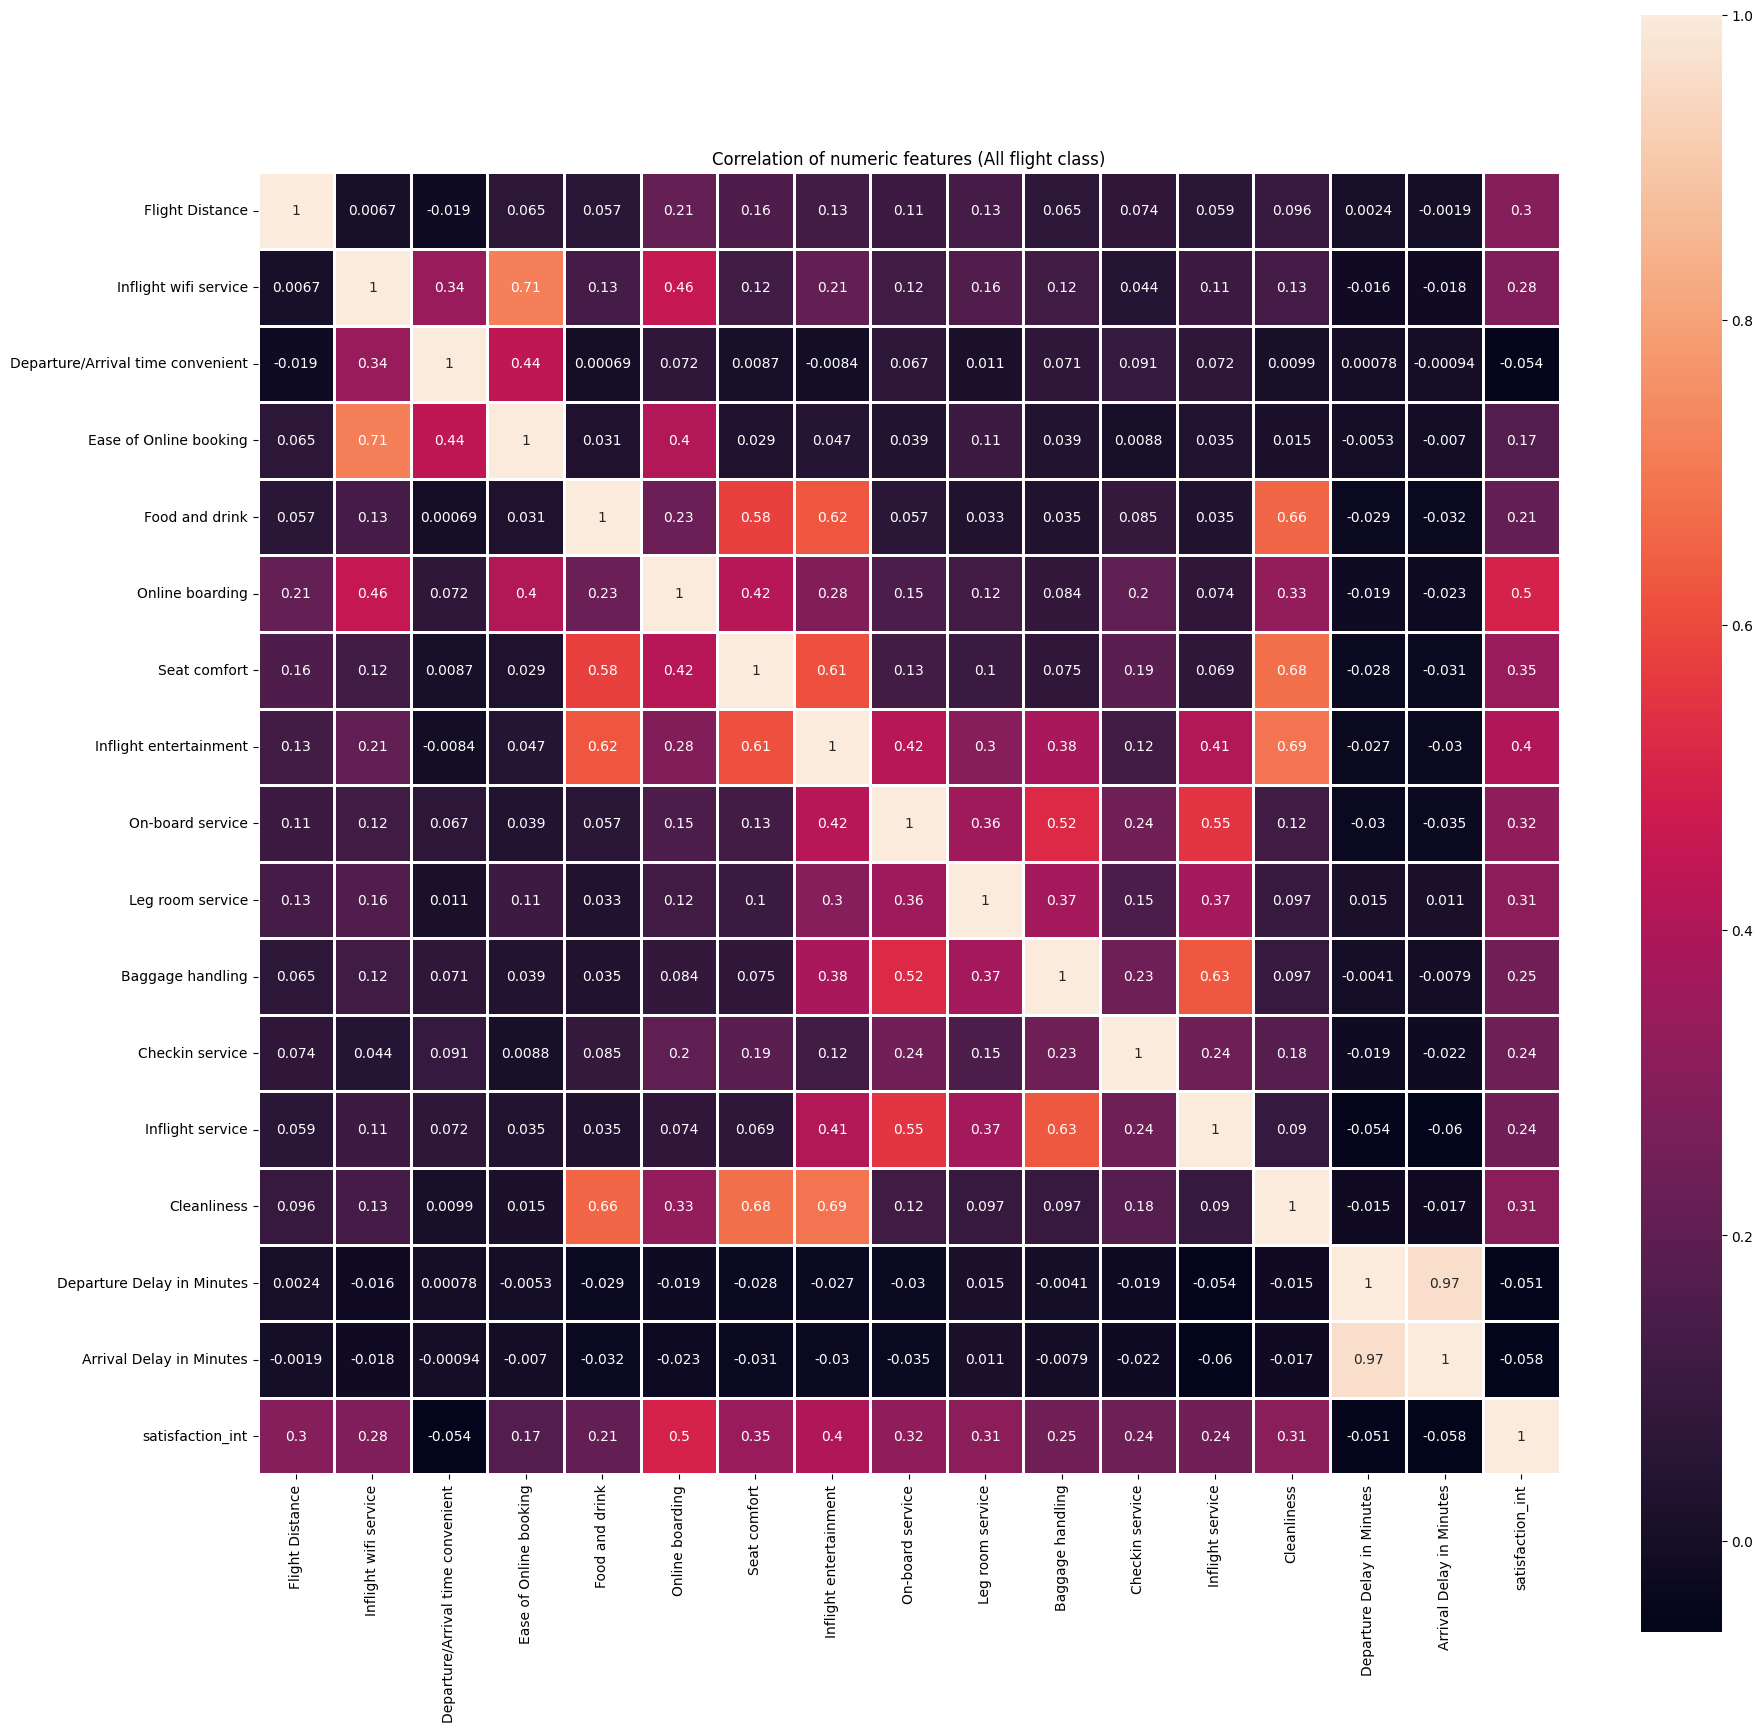

In [80]:
# Correlation heatmap
plt.figure(figsize=(21,21))
plt.title('Correlation of numeric features (All flight class)')
sns.heatmap(df_correlation, square=True, linewidths=0.8, annot=True, annot_kws={"size":10})
plt.show()

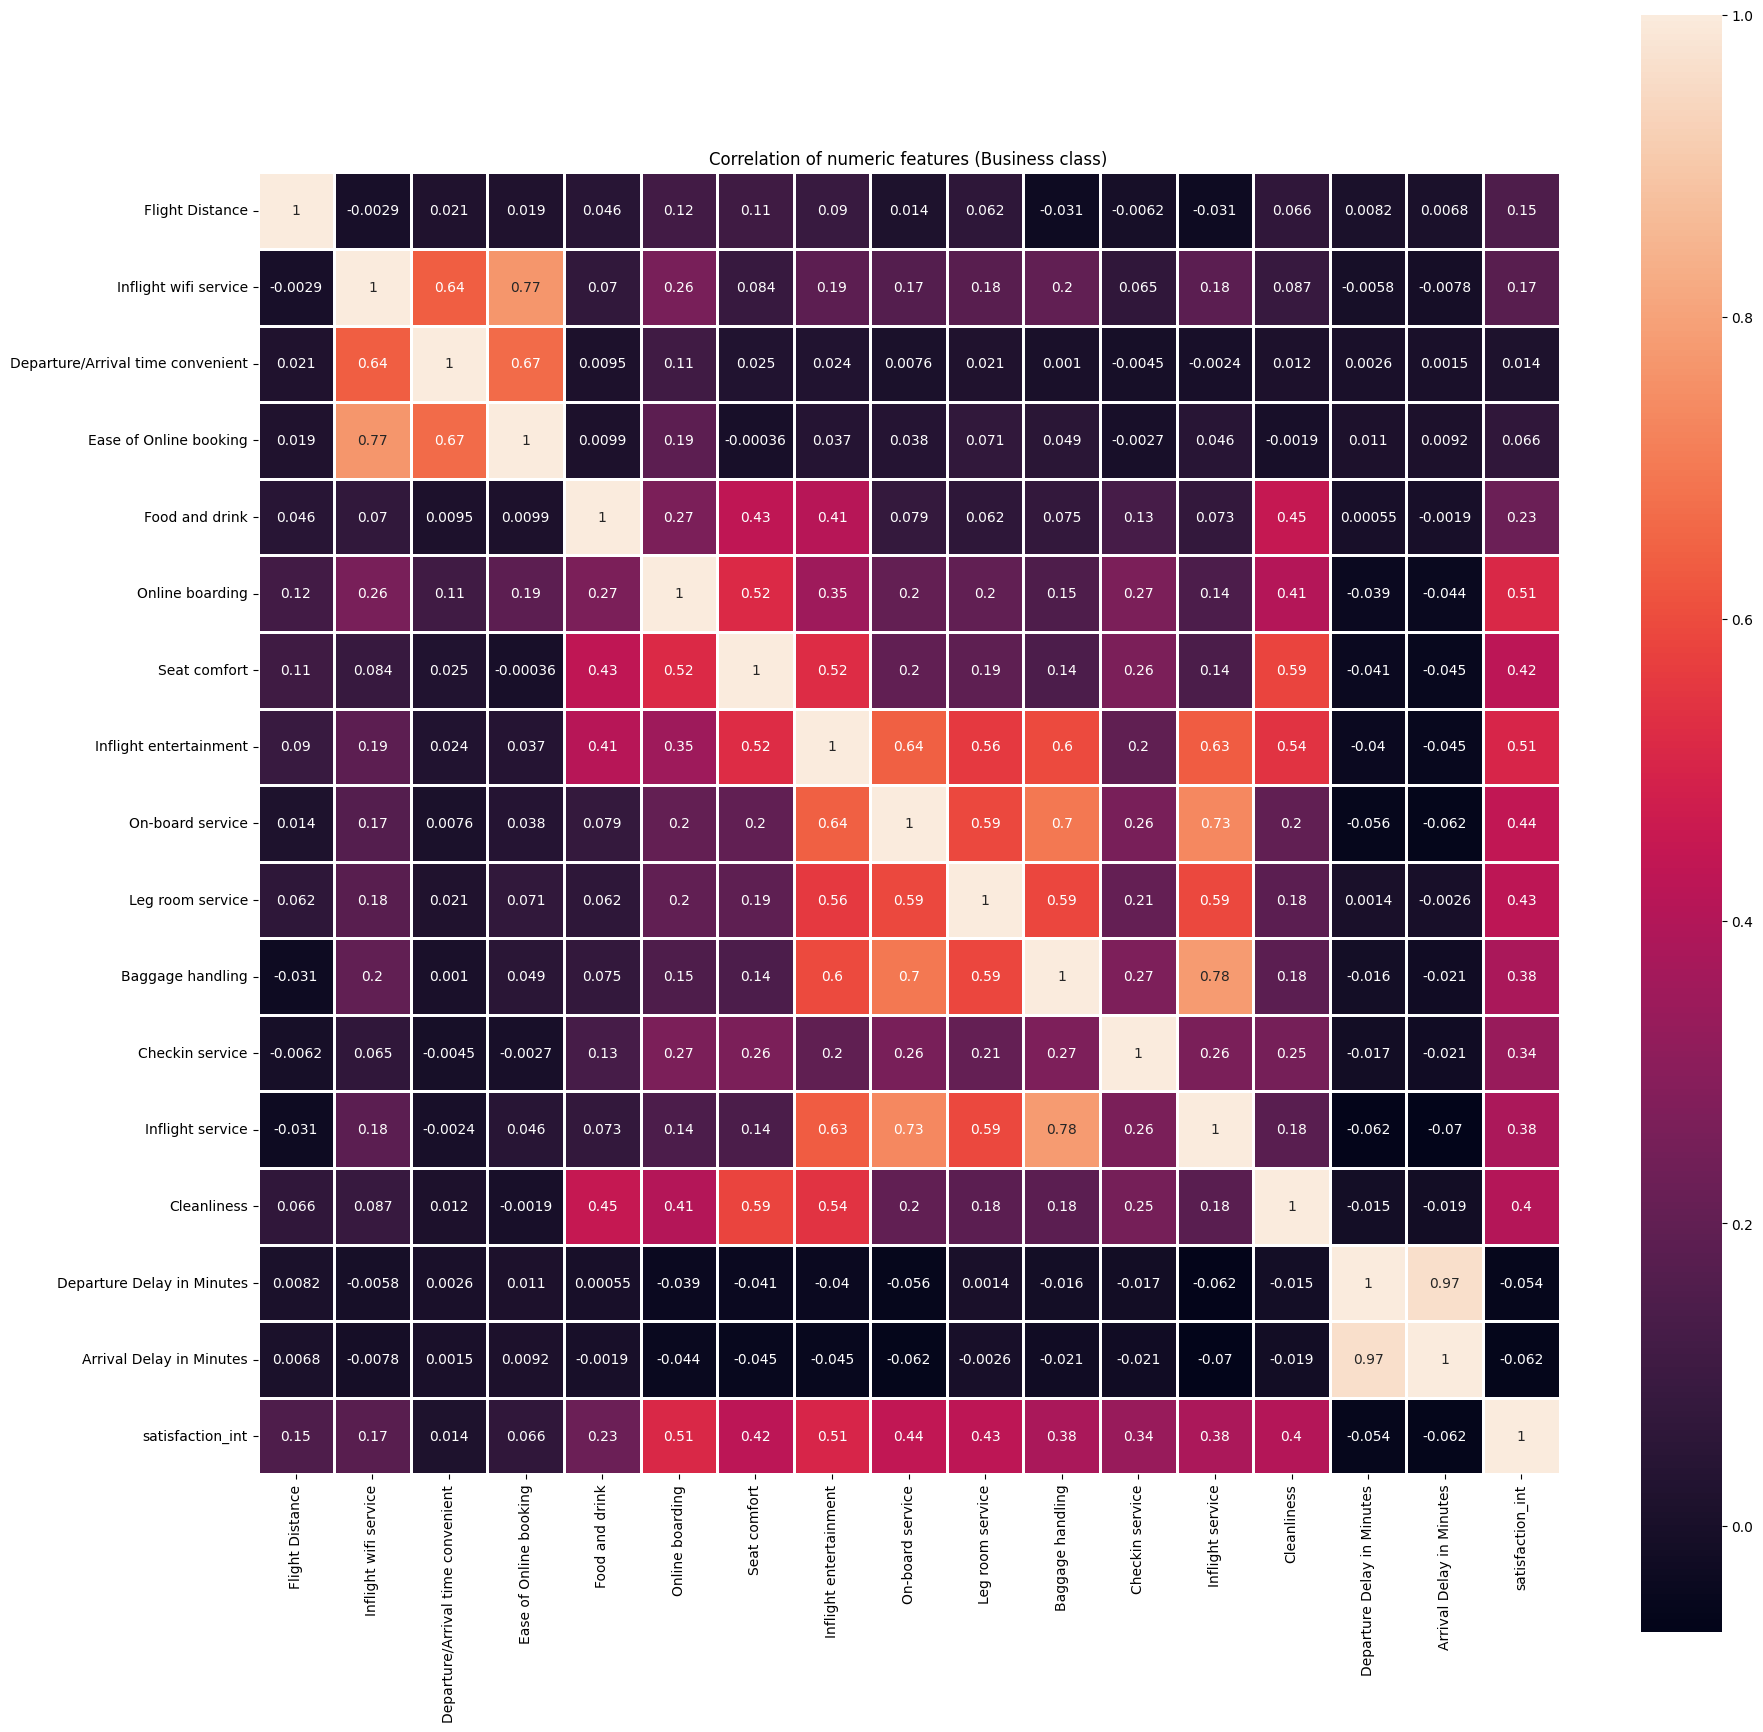

In [81]:
# Correlation heatmap
plt.figure(figsize=(21,21))
plt.title('Correlation of numeric features (Business class)')
sns.heatmap(df_business_correlation, square=True, linewidths=0.8, annot=True, annot_kws={"size":10})
plt.show()

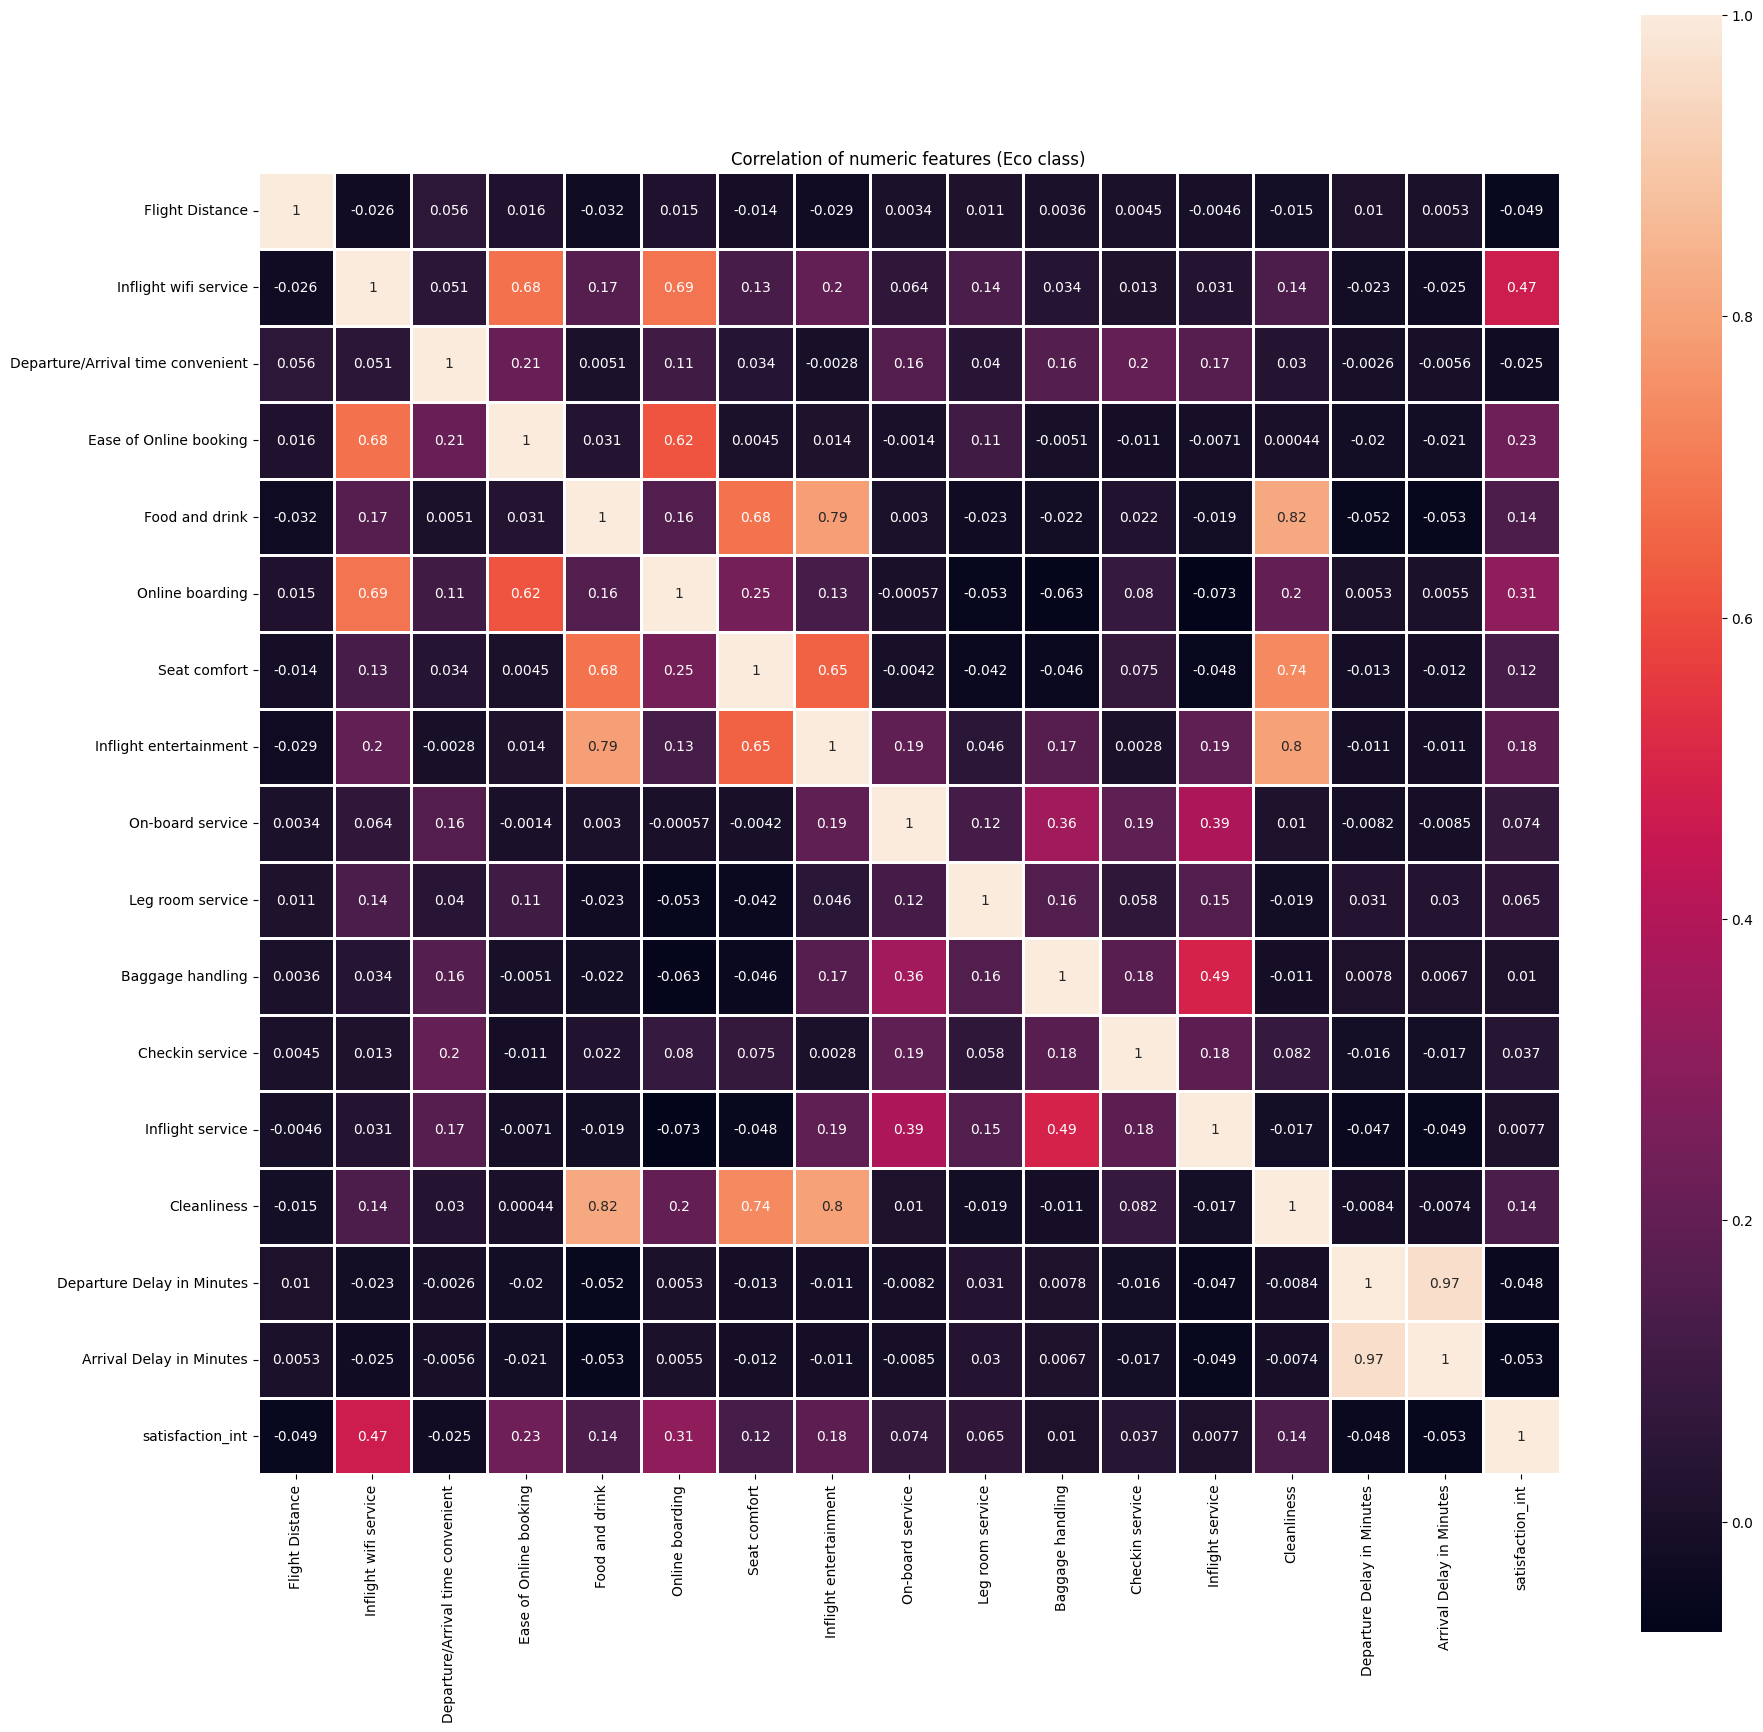

In [82]:
# Correlation heatmap
plt.figure(figsize=(21,21))
plt.title('Correlation of numeric features (Eco class)')
sns.heatmap(df_eco_correlation, square=True, linewidths=0.8, annot=True, annot_kws={"size":10})
plt.show()

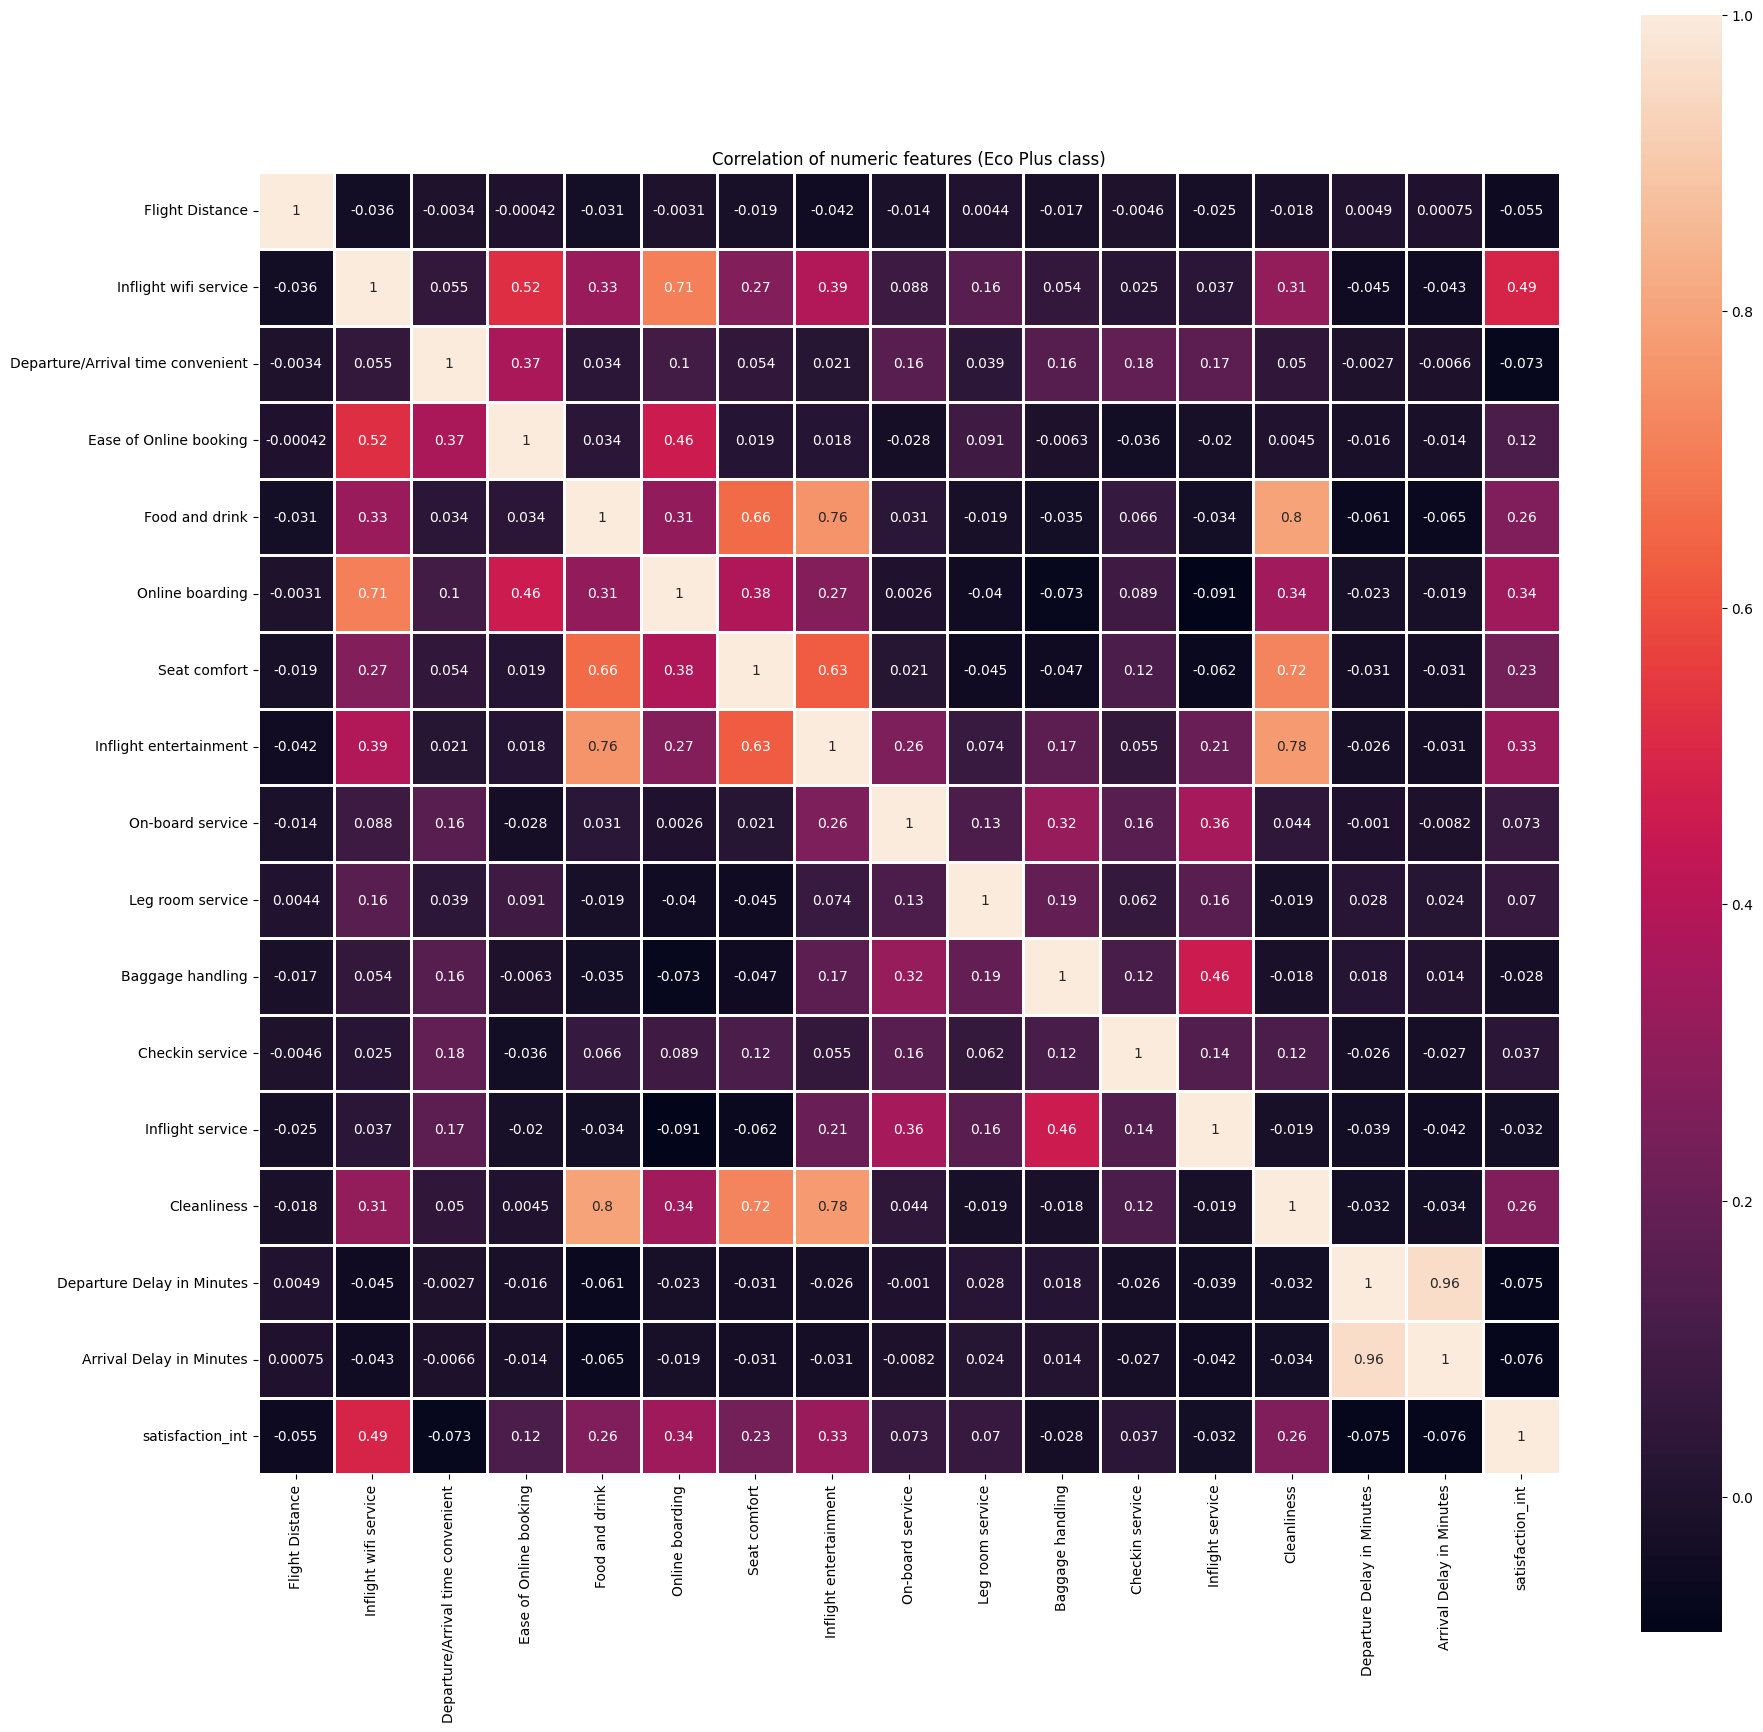

In [83]:
# Correlation heatmap
plt.figure(figsize=(21,21))
plt.title('Correlation of numeric features (Eco Plus class)')
sns.heatmap(df_eco_plus_correlation, square=True, linewidths=0.8, annot=True, annot_kws={"size":10})
plt.show()

#### Data Quality Verification

In [84]:
# Prints dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction                       129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [85]:
# Getting sum of null values in the dataframe
df.isna().sum()

id                                     0
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### Data Preparation

#### Data Selection

In [86]:
# Remove ba natin yung Customer Type, Type of Travel, and Flight Distance?
# Remove unneeded fields (i.e., id, gender, customer type, age, type of travel, flight distance, gate location)
df.drop(columns=['id', 'Gender', 'Age', 'Gate location'], axis=1, inplace=True)
df

,satisfaction,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,disloyal Customer,Personal Travel,Eco,369,0,2,0,3,0,3,3,1,5,3,3,4,3,0,0.0
1,satisfied,disloyal Customer,Personal Travel,Eco,2486,0,2,1,2,1,3,2,1,1,4,4,3,2,0,0.0
2,satisfied,disloyal Customer,Personal Travel,Eco,1448,0,3,0,3,0,3,3,3,5,3,2,3,3,0,0.0
3,satisfied,disloyal Customer,Personal Travel,Eco,1501,0,4,0,4,0,4,4,5,4,5,5,5,4,0,0.0
4,satisfied,disloyal Customer,Personal Travel,Eco,577,0,5,0,3,5,3,3,3,4,5,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Loyal Customer,Business travel,Business,2592,5,5,5,4,2,4,5,5,5,5,5,5,4,0,0.0
129876,satisfied,Loyal Customer,Business travel,Eco,610,5,1,1,5,5,5,5,5,4,1,2,5,5,82,65.0
129877,satisfied,Loyal Customer,Business travel,Business,86,1,1,1,5,5,5,5,1,3,1,5,2,2,0,0.0
129878,satisfied,Loyal Customer,Business travel,Business,83,1,1,1,5,5,5,5,4,4,2,5,5,5,0,0.0


#### Data Cleaning

In [87]:
df.dropna(inplace=True)
df.isna().sum()

satisfaction                         0
Customer Type                        0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [88]:
df['satisfaction'] = df.pop('satisfaction')
df

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,disloyal Customer,Personal Travel,Eco,369,0,2,0,3,0,3,3,1,5,3,3,4,3,0,0.0,satisfied
1,disloyal Customer,Personal Travel,Eco,2486,0,2,1,2,1,3,2,1,1,4,4,3,2,0,0.0,satisfied
2,disloyal Customer,Personal Travel,Eco,1448,0,3,0,3,0,3,3,3,5,3,2,3,3,0,0.0,satisfied
3,disloyal Customer,Personal Travel,Eco,1501,0,4,0,4,0,4,4,5,4,5,5,5,4,0,0.0,satisfied
4,disloyal Customer,Personal Travel,Eco,577,0,5,0,3,5,3,3,3,4,5,3,4,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Loyal Customer,Business travel,Business,2592,5,5,5,4,2,4,5,5,5,5,5,5,4,0,0.0,satisfied
129876,Loyal Customer,Business travel,Eco,610,5,1,1,5,5,5,5,5,4,1,2,5,5,82,65.0,satisfied
129877,Loyal Customer,Business travel,Business,86,1,1,1,5,5,5,5,1,3,1,5,2,2,0,0.0,satisfied
129878,Loyal Customer,Business travel,Business,83,1,1,1,5,5,5,5,4,4,2,5,5,5,0,0.0,satisfied


### Modeling

In [89]:
features = df.columns.tolist()
features = features[:-1]
features

X = df[features]
y = df['satisfaction']

x_encoded = pd.get_dummies(X, drop_first=True)

#### Decision Tree

In [90]:
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, stratify=y)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20201  1767]
 [ 2026 14853]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.92      0.91     21968
              satisfied       0.89      0.88      0.89     16879

               accuracy                           0.90     38847
              macro avg       0.90      0.90      0.90     38847
           weighted avg       0.90      0.90      0.90     38847



In [91]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the accuracy for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    accuracy.append(score)

clf

DecisionTreeClassifier(max_depth=5, random_state=0)

[Text(0.45121951219512196, 0.9166666666666666, 'Online boarding <= 3.5\nsamples = 100.0%\nvalue = [0.566, 0.434]\nclass = satisfied'),
 Text(0.13414634146341464, 0.75, 'Inflight wifi service <= 0.5\nsamples = 50.4%\nvalue = [0.851, 0.149]\nclass = satisfied'),
 Text(0.04878048780487805, 0.5833333333333334, 'Cleanliness <= 0.5\nsamples = 1.7%\nvalue = [0.006, 0.994]\nclass = satisfied'),
 Text(0.024390243902439025, 0.4166666666666667, 'samples = 0.0%\nvalue = [1.0, 0.0]\nclass = satisfied'),
 Text(0.07317073170731707, 0.4166666666666667, 'samples = 1.7%\nvalue = [0.0, 1.0]\nclass = satisfied'),
 Text(0.21951219512195122, 0.5833333333333334, 'Inflight wifi service <= 3.5\nsamples = 48.7%\nvalue = [0.88, 0.12]\nclass = satisfied'),
 Text(0.12195121951219512, 0.4166666666666667, 'Class_Eco <= 0.5\nsamples = 44.2%\nvalue = [0.935, 0.065]\nclass = satisfied'),
 Text(0.07317073170731707, 0.25, 'Inflight entertainment <= 3.5\nsamples = 16.5%\nvalue = [0.851, 0.149]\nclass = satisfied'),
 Text(

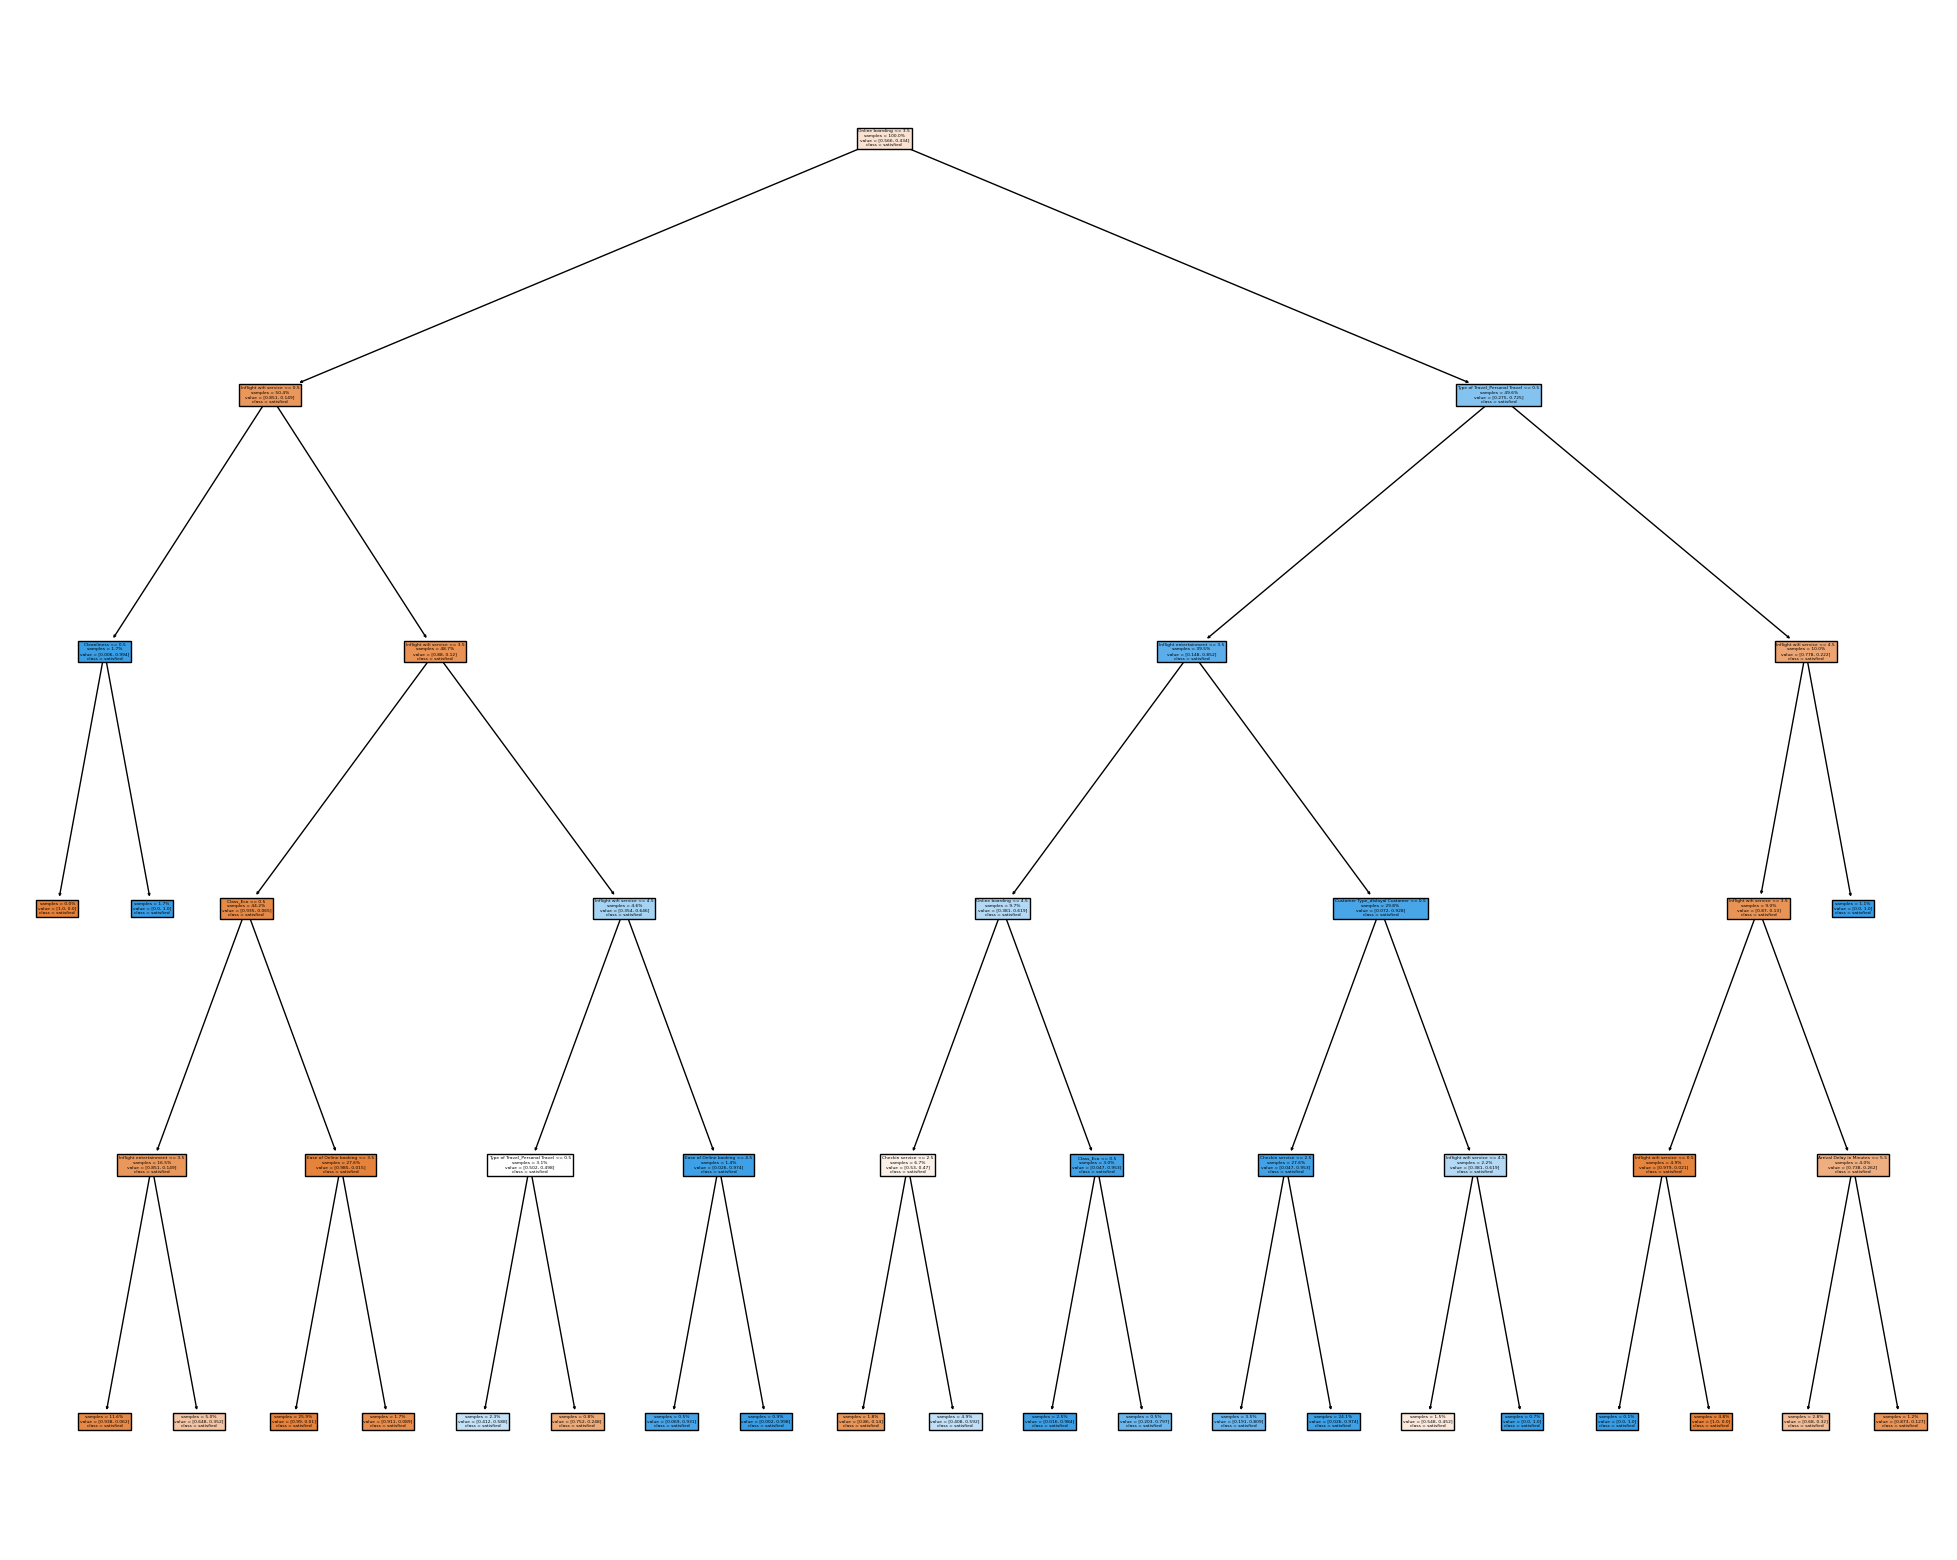

In [92]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = x_encoded.columns,
            class_names=y, 
            impurity=False,
            proportion=True,
            filled=True)

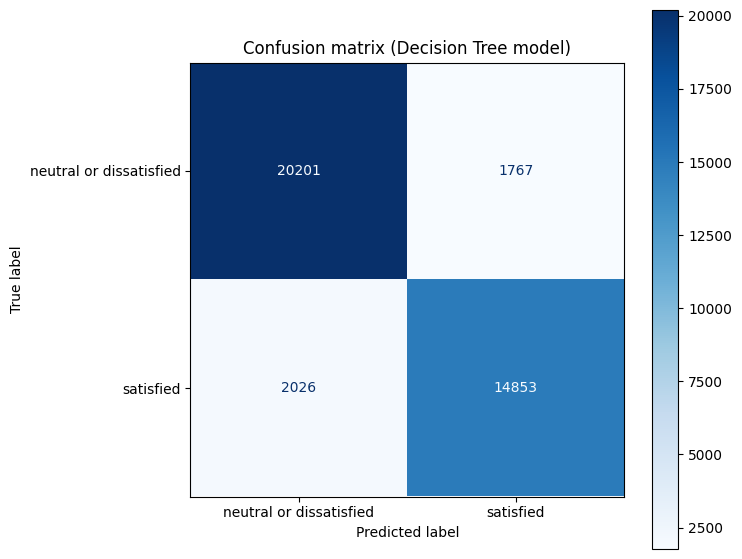

In [93]:
cm = confusion_matrix(y_test, y_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot(cmap="Blues", values_format='')
disp.ax_.set_title("Confusion matrix (Decision Tree model)")
disp.figure_.set_figheight(7)
disp.figure_.set_figwidth(7)
plt.show()

#### Logistic regression

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, stratify=y)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[18703  3265]
 [ 3091 13788]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.86      0.85      0.85     21968
              satisfied       0.81      0.82      0.81     16879

               accuracy                           0.84     38847
              macro avg       0.83      0.83      0.83     38847
           weighted avg       0.84      0.84      0.84     38847



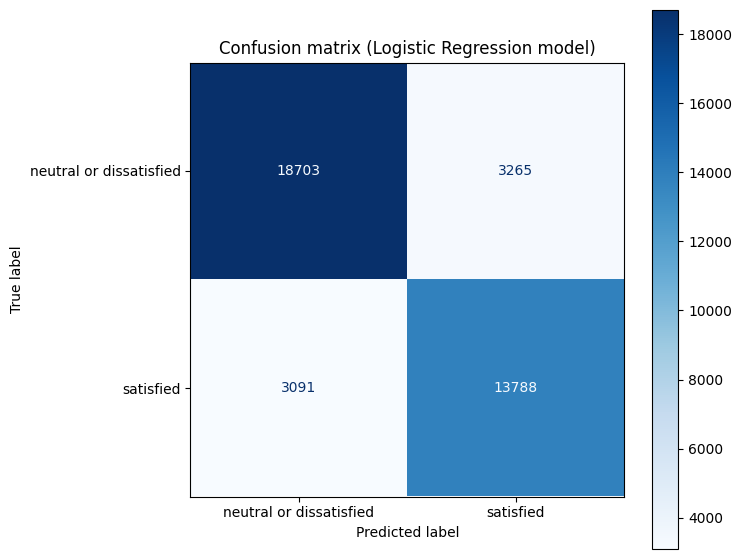

In [95]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap="Blues", values_format='')
disp.ax_.set_title("Confusion matrix (Logistic Regression model)")
disp.figure_.set_figheight(7)
disp.figure_.set_figwidth(7)
plt.show()

#### KNN

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21562   406]
 [ 2669 14210]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.89      0.98      0.93     21968
              satisfied       0.97      0.84      0.90     16879

               accuracy                           0.92     38847
              macro avg       0.93      0.91      0.92     38847
           weighted avg       0.93      0.92      0.92     38847



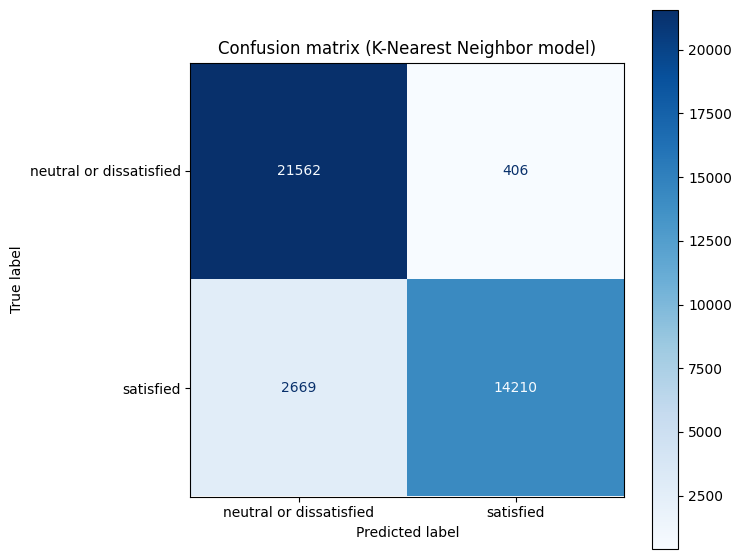

In [97]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap="Blues", values_format='')
disp.ax_.set_title("Confusion matrix (K-Nearest Neighbor model)")
disp.figure_.set_figheight(7)
disp.figure_.set_figwidth(7)
plt.show()